In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Mounted at /content/drive


# Load Dataset

In [4]:
#Define the file paths

X_train_path = '/content/drive/MyDrive/PetSnapper/input.csv'
Y_train_path = '/content/drive/MyDrive/PetSnapper/labels.csv'
X_test_path = '/content/drive/MyDrive/PetSnapper/input_test.csv'
Y_test_path = '/content/drive/MyDrive/PetSnapper/labels_test.csv'

X_train = np.loadtxt(X_train_path, delimiter=',')
Y_train = np.loadtxt(Y_train_path, delimiter=',')

X_test = np.loadtxt(X_test_path, delimiter = ',')
Y_test = np.loadtxt(Y_test_path, delimiter = ',')

# X_train = np.loadtxt('input.csv', delimiter = ',')
# Y_train = np.loadtxt('labels.csv', delimiter = ',')

# X_test = np.loadtxt('input_test.csv', delimiter = ',')
# Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


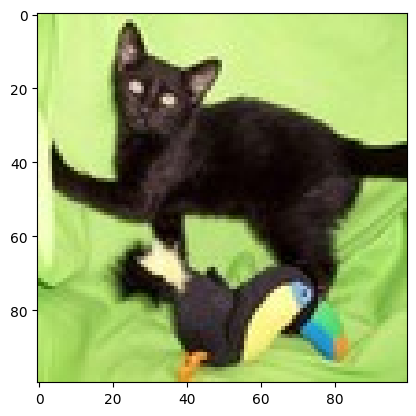

In [7]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 680ms/step - accuracy: 0.5138 - loss: 0.9632
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 744ms/step - accuracy: 0.5438 - loss: 0.6928
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 683ms/step - accuracy: 0.5793 - loss: 0.6869
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 685ms/step - accuracy: 0.5911 - loss: 0.6718
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 747ms/step - accuracy: 0.6358 - loss: 0.6363


In [12]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6657 - loss: 0.6190


[0.6019700169563293, 0.6974999904632568]

# Making predictions

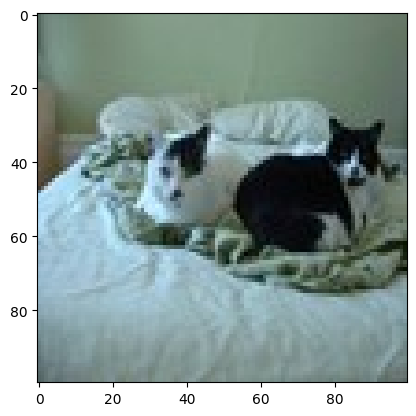

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Our model says it is a : cat


In [15]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

In [18]:
#model.save('/content/drive/MyDrive/PetSnapper/cat_dog_model.h5')
model.save("cat_dog_model.keras")


In [19]:
from google.colab import files
files.download("cat_dog_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>